In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('../../data/train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Extract features like hour, month etc. from the datetime column.

Plot small sections of the data (1 day, 1 week etc.)

Group by a time feature and observe grouped means

In [4]:
df['datetime']=pd.to_datetime(df['datetime'])

 - 1. pd.DatetimeIndex(df['datetime']).year
 - 2. df['year'] = df['datetime'].dt.year
 - 3. df['month'] = df['datetime'].dt.month

In [5]:
df['year']=pd.DatetimeIndex(df['datetime']).year
df['month'] = pd.DatetimeIndex(df['datetime']).month
df['date'] = pd.DatetimeIndex(df['datetime']).day
df['hour'] = pd.DatetimeIndex(df['datetime']).hour
df['weekday'] = pd.DatetimeIndex(df['datetime']).weekday
df.set_index(pd.to_datetime(df['datetime']), inplace = True)

<AxesSubplot:xlabel='hour'>

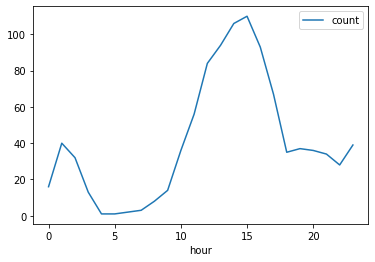

In [6]:
#plot a day
df.loc[(df['year']==2011)&(df['month']==1)&(df['date']==1)].plot(x ='hour',y = 'count')

<AxesSubplot:xlabel='month'>

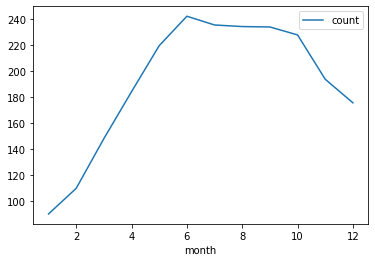

In [7]:
df.groupby(['month'])['count'].mean().to_frame().plot(y='count')

Text(0, 0.5, 'count')

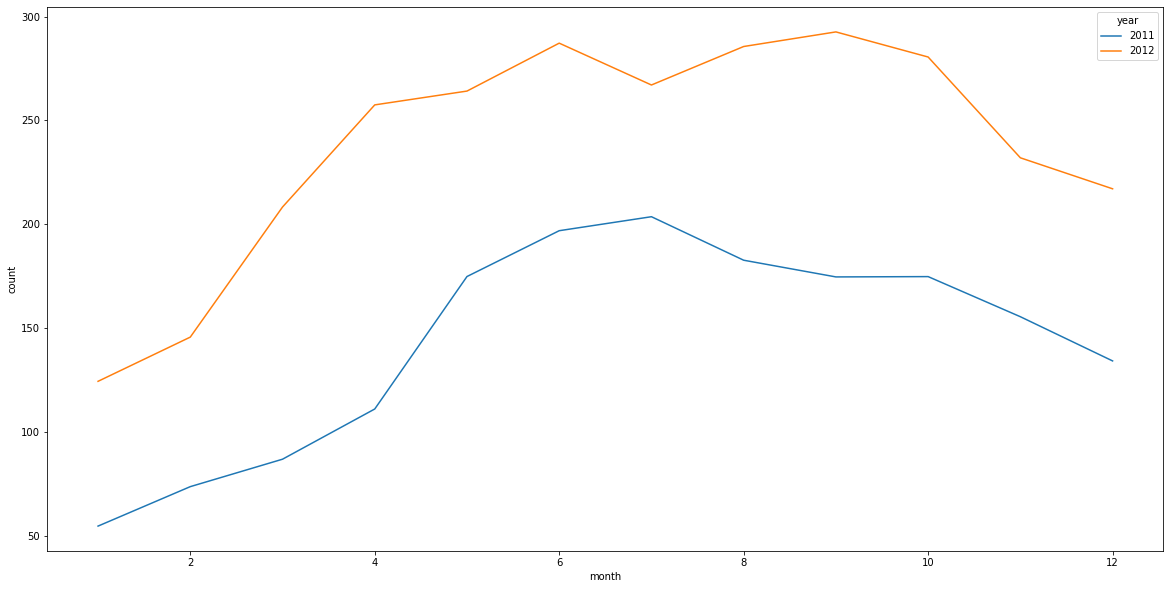

In [8]:
#groupby month, weekday
fig, ax = plt.subplots(figsize=(20,10))
df.groupby(['month','year']).mean()['count'].unstack().plot(ax=ax)
ax.set_ylabel('count')

Text(0, 0.5, 'count')

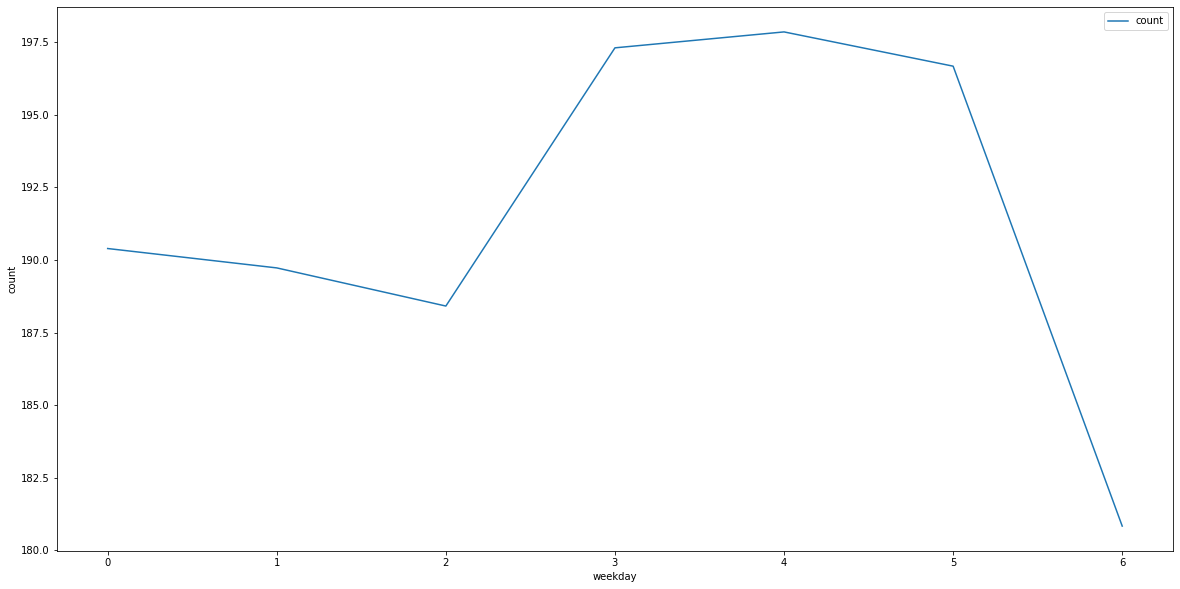

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
df.groupby('weekday')['count'].mean().to_frame().plot(ax=ax)
ax.set_ylabel('count')

<AxesSubplot:xlabel='season'>

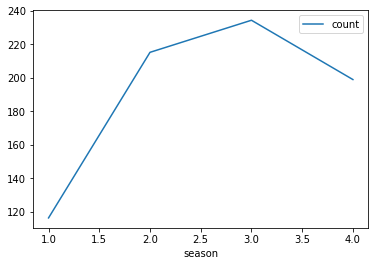

In [10]:
df.groupby('season')['count'].mean().to_frame().plot(y='count')

# cal PCA

In [11]:
df_to_scale=df.drop(['datetime','year','date','casual','registered'],axis=1)

In [12]:
X= df_to_scale.loc[:,df_to_scale.columns!='count']
y= df_to_scale['count']

In [13]:
X.shape, y.shape

((10886, 11), (10886,))

In [14]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()
transformer.fit(X)
X_scale=transformer.transform(X)
X_scale[:5]

array([[-1.34986372, -0.17149048, -1.46067232, -0.66017842, -1.33366069,
        -1.09273697,  0.99321305, -1.56775367, -1.60312148, -1.66894356,
         0.99079257],
       [-1.34986372, -0.17149048, -1.46067232, -0.66017842, -1.43890721,
        -1.18242083,  0.94124921, -1.56775367, -1.60312148, -1.52434128,
         0.99079257],
       [-1.34986372, -0.17149048, -1.46067232, -0.66017842, -1.43890721,
        -1.18242083,  0.94124921, -1.56775367, -1.60312148, -1.379739  ,
         0.99079257],
       [-1.34986372, -0.17149048, -1.46067232, -0.66017842, -1.33366069,
        -1.09273697,  0.68142998, -1.56775367, -1.60312148, -1.23513672,
         0.99079257],
       [-1.34986372, -0.17149048, -1.46067232, -0.66017842, -1.33366069,
        -1.09273697,  0.68142998, -1.56775367, -1.60312148, -1.09053444,
         0.99079257]])

In [15]:
features = X_scale.T
cov_matrix = np.cov(features)
cov_matrix

array([[ 1.00009187e+00,  2.93703077e-02, -8.12680440e-03,
         8.87946653e-03,  2.58712316e-01,  2.64768648e-01,
         1.90627532e-01, -1.47134725e-01,  9.71613053e-01,
        -6.54627543e-03, -1.05535119e-02],
       [ 2.93703077e-02,  1.00009187e+00, -2.50514404e-01,
        -7.07456138e-03,  2.94630458e-04, -5.21525730e-03,
         1.92888843e-03,  8.40951029e-03,  1.73161654e-03,
        -3.54193646e-04, -1.91849647e-01],
       [-8.12680440e-03, -2.50514404e-01,  1.00009187e+00,
         3.37749449e-02,  2.99683001e-02,  2.46625949e-02,
        -1.08808447e-02,  1.33745412e-02, -3.39470535e-03,
         2.78048991e-03, -7.04332135e-01],
       [ 8.87946653e-03, -7.07456138e-03,  3.37749449e-02,
         1.00009187e+00, -5.50404742e-02, -5.53810606e-02,
         4.06280973e-01,  7.26179124e-03,  1.21450924e-02,
        -2.27424246e-02, -4.76968282e-02],
       [ 2.58712316e-01,  2.94630458e-04,  2.99683001e-02,
        -5.50404742e-02,  1.00009187e+00,  9.85038597e-01,
  

In [15]:
values, vectors = np.linalg.eig(cov_matrix)
values[:5],vectors[:5]

(array([2.55342866, 1.8636242 , 1.71374234, 0.43995282, 0.0279592 ]),
 array([[-0.50311503, -0.25292648, -0.03187057,  0.0723002 ,  0.70581109,
         -0.00359605,  0.00168637, -0.04670598, -0.40714412, -0.10143246,
          0.01546016],
        [-0.00847947, -0.0173833 , -0.06443633,  0.03227871, -0.01925634,
         -0.01197926, -0.35406699,  0.03286751, -0.07671292,  0.14218265,
         -0.91726396],
        [-0.02917509,  0.10050387,  0.69959726,  0.02362449,  0.00099144,
         -0.01902257, -0.66602143,  0.01560519, -0.07838263,  0.02842301,
          0.2188852 ],
        [-0.00360507, -0.30019812,  0.14698164,  0.52540349, -0.00321844,
         -0.00391841,  0.00898743, -0.01276183,  0.42460573, -0.6449271 ,
         -0.12540063],
        [-0.4747159 ,  0.36308687, -0.03003605, -0.01115947,  0.00308056,
          0.70596176, -0.0268561 , -0.1050062 ,  0.35771458,  0.05543715,
         -0.02477901]]))

In [16]:
explained_value=[]
for i in range(len(values)):
    explained_value.append(values[i]/ np.sum(values))
print (np.sum(explained_value), '\n',explained_value)

0.9999999999999998 
 [0.23210855461363977, 0.16940481828553752, 0.15578044707486588, 0.03999203677389912, 0.0025415120382601838, 0.001277854798136592, 0.015968431225896026, 0.07466322178931872, 0.11173805703192545, 0.09491407905351258, 0.101610987315008]


In [17]:
X.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'month', 'hour', 'weekday'],
      dtype='object')

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size= 0.1)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((9797, 11), (1089, 11), (9797,), (1089,))

In [20]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# pipe

In [21]:
pipe=make_pipeline(StandardScaler(),PolynomialFeatures(4),LinearRegression())
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [22]:
pipe.score(X_test, y_test),pipe.score(X_train, y_train)

(0.5504575841480438, 0.663085283579675)

# column transformer

In [62]:
trans = make_column_transformer((PolynomialFeatures(3),['season']),
                               (PolynomialFeatures(2),['hour']),
                               (PolynomialFeatures(2),['humidity']),
                               (PolynomialFeatures(2),['temp']),
                               (PolynomialFeatures(2),['workingday']))
                            

In [63]:
trans.fit(X_train)

ColumnTransformer(transformers=[('polynomialfeatures-1',
                                 PolynomialFeatures(degree=3), ['season']),
                                ('polynomialfeatures-2', PolynomialFeatures(),
                                 ['hour']),
                                ('polynomialfeatures-3', PolynomialFeatures(),
                                 ['humidity']),
                                ('polynomialfeatures-4', PolynomialFeatures(),
                                 ['temp']),
                                ('polynomialfeatures-5', PolynomialFeatures(),
                                 ['workingday'])])

In [64]:
X_train_trans = trans.transform(X_train)

In [65]:
X_test_trans = trans.transform(X_test)

In [66]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

LinearRegression()

In [67]:
lr.score(X_test_trans,y_test)

0.4304715438520278

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [73]:
y_pred=lr.predict(X_test_trans)
mean_squared_error(y_pred,y_test)

18851.105251963327

In [74]:
mean_absolute_error(y_test, y_pred)

100.26405937566747

In [75]:
r2_score(y_test, y_pred)

0.4304715438520278